# Using golf_df dataset

In [1]:
import pandas as pd
from sklearn.model_selection import cross_validate,train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sb

In [2]:
golf_file=pd.read_csv(r"C:\Users\shash\OneDrive\Desktop\mit\3rd sem\ml\OneDrive_1_15-8-2023\DATASETS-16AUG2023\golf_df.csv")
golf_file.head()

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [3]:
x=golf_file.drop(columns='Play')
x

,Outlook,Temperature,Humidity,Windy
0,sunny,hot,high,False
1,sunny,hot,high,True
2,overcast,hot,high,False
3,rainy,mild,high,False
4,rainy,cool,normal,False
5,rainy,cool,normal,True
6,overcast,cool,normal,True
7,sunny,mild,high,False
8,sunny,cool,normal,False
9,rainy,mild,normal,False


In [4]:
y=golf_file["Play"]
y

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: Play, dtype: object

In [5]:
le=LabelEncoder()
x_en=x.apply(le.fit_transform)
x_en

,Outlook,Temperature,Humidity,Windy
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0
5,1,0,1,1
6,0,0,1,1
7,2,2,0,0
8,2,0,1,0
9,1,2,1,0


In [6]:
y_en=le.fit_transform(y.values)
y_en

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [7]:
x_test,x_train,y_test,y_train=train_test_split(x_en,y_en,test_size=0.3,random_state=42)
x_test.shape,x_train.shape,y_test.shape,y_train.shape

((9, 4), (5, 4), (9,), (5,))

In [8]:
model=GaussianNB()


In [9]:
model.fit(x_train,y_train)

GaussianNB()

In [10]:
y_pred=model.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 0])

<Axes: >

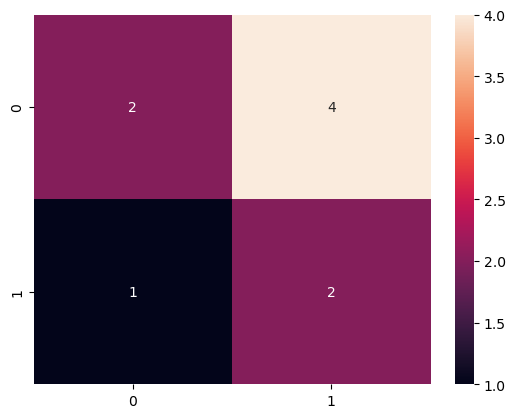

In [11]:
con_mat=confusion_matrix(y_pred,y_test)
con_mat =pd.DataFrame(con_mat)
sb.heatmap(con_mat,annot=True)

#  Using weatherHistory dataset

In [12]:
data=pd.read_csv(r"C:\Users\shash\OneDrive\Desktop\mit\3rd sem\ml\OneDrive_1_15-8-2023\DATASETS-16AUG2023\weatherHistory.csv")
data



,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [13]:
x=data.drop('Daily Summary',axis=1)
x

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51
...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95


In [14]:
y=data['Daily Summary']
y

0             Partly cloudy throughout the day.
1             Partly cloudy throughout the day.
2             Partly cloudy throughout the day.
3             Partly cloudy throughout the day.
4             Partly cloudy throughout the day.
                          ...                  
96448    Partly cloudy starting in the morning.
96449    Partly cloudy starting in the morning.
96450    Partly cloudy starting in the morning.
96451    Partly cloudy starting in the morning.
96452    Partly cloudy starting in the morning.
Name: Daily Summary, Length: 96453, dtype: object

In [15]:
len=LabelEncoder()
xx=x.apply(len.fit_transform)
xx

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,2159,19,0,3388,3926,78,876,251,936,0,2351
1,2160,19,0,3367,3897,75,885,259,936,0,2401
2,2161,17,0,3371,4281,78,243,204,888,0,2432
3,2162,19,0,3176,3666,72,875,269,936,0,2479
4,2163,17,0,3260,3852,72,685,259,936,0,2489
...,...,...,...,...,...,...,...,...,...,...,...
96448,93711,19,0,6330,7234,32,682,31,948,0,2274
96449,93712,19,0,6085,6989,37,626,20,922,0,2354
96450,93713,19,0,5637,6541,45,557,30,948,0,2404
96451,93714,19,0,5549,6453,49,653,20,948,0,2433


In [16]:
yy=len.fit_transform(y.values)
yy

array([197, 197, 197, ..., 170, 170, 170])

In [17]:
x_train,x_test,y_train,y_test=train_test_split(xx,yy,test_size=0.3,random_state=42)

In [18]:
ml=GaussianNB()

In [19]:
ml.fit(x_train,y_train)

GaussianNB()

In [20]:
pred=ml.predict(x_test)

In [21]:
pred

array([197, 111, 111, ..., 197, 111, 111])

In [22]:
accuracy_score(y_test,pred)

0.26316698921758364

<Axes: >

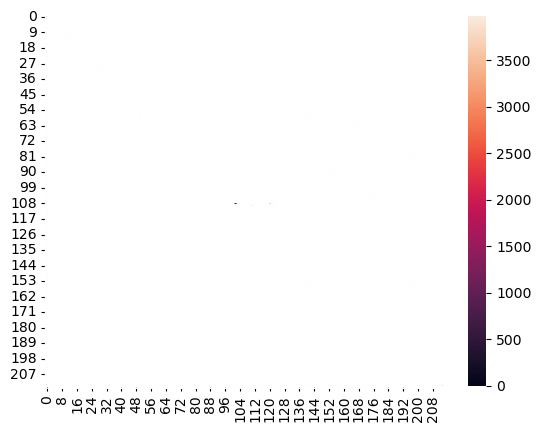

In [23]:
cn=confusion_matrix(y_test,pred)
cn=pd.DataFrame(cn)
sb.heatmap(cn,annot=True)